In [2]:

get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML
InteractiveShell.ast_node_interactivity = "all"

import sys
import pickle
import glob



import os 
import pandas as pd 
import itertools
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import random
import numpy as np
import wfdb
from collections import OrderedDict
from datetime import datetime 
import pickle 
import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import metrics, tree, preprocessing, linear_model
from sklearn.metrics import roc_curve, auc, precision_recall_curve

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

shap.initjs()

c:\python3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
data = pd.read_csv("D:/NLP/SARRLEK-master/Data/ct_report_dmg_thoracic_only_unsupervised_CLEAN.txt", sep=',', header=None)
data = data.rename(columns={0 : "index", 1 : "text"})

In [4]:
count_nan = len(data) - data.count()
count_nan

index     0
text     13
dtype: int64

scipy.sparse.csr.csr_matrix

100%|===================| 539/540 [00:41<00:00]        

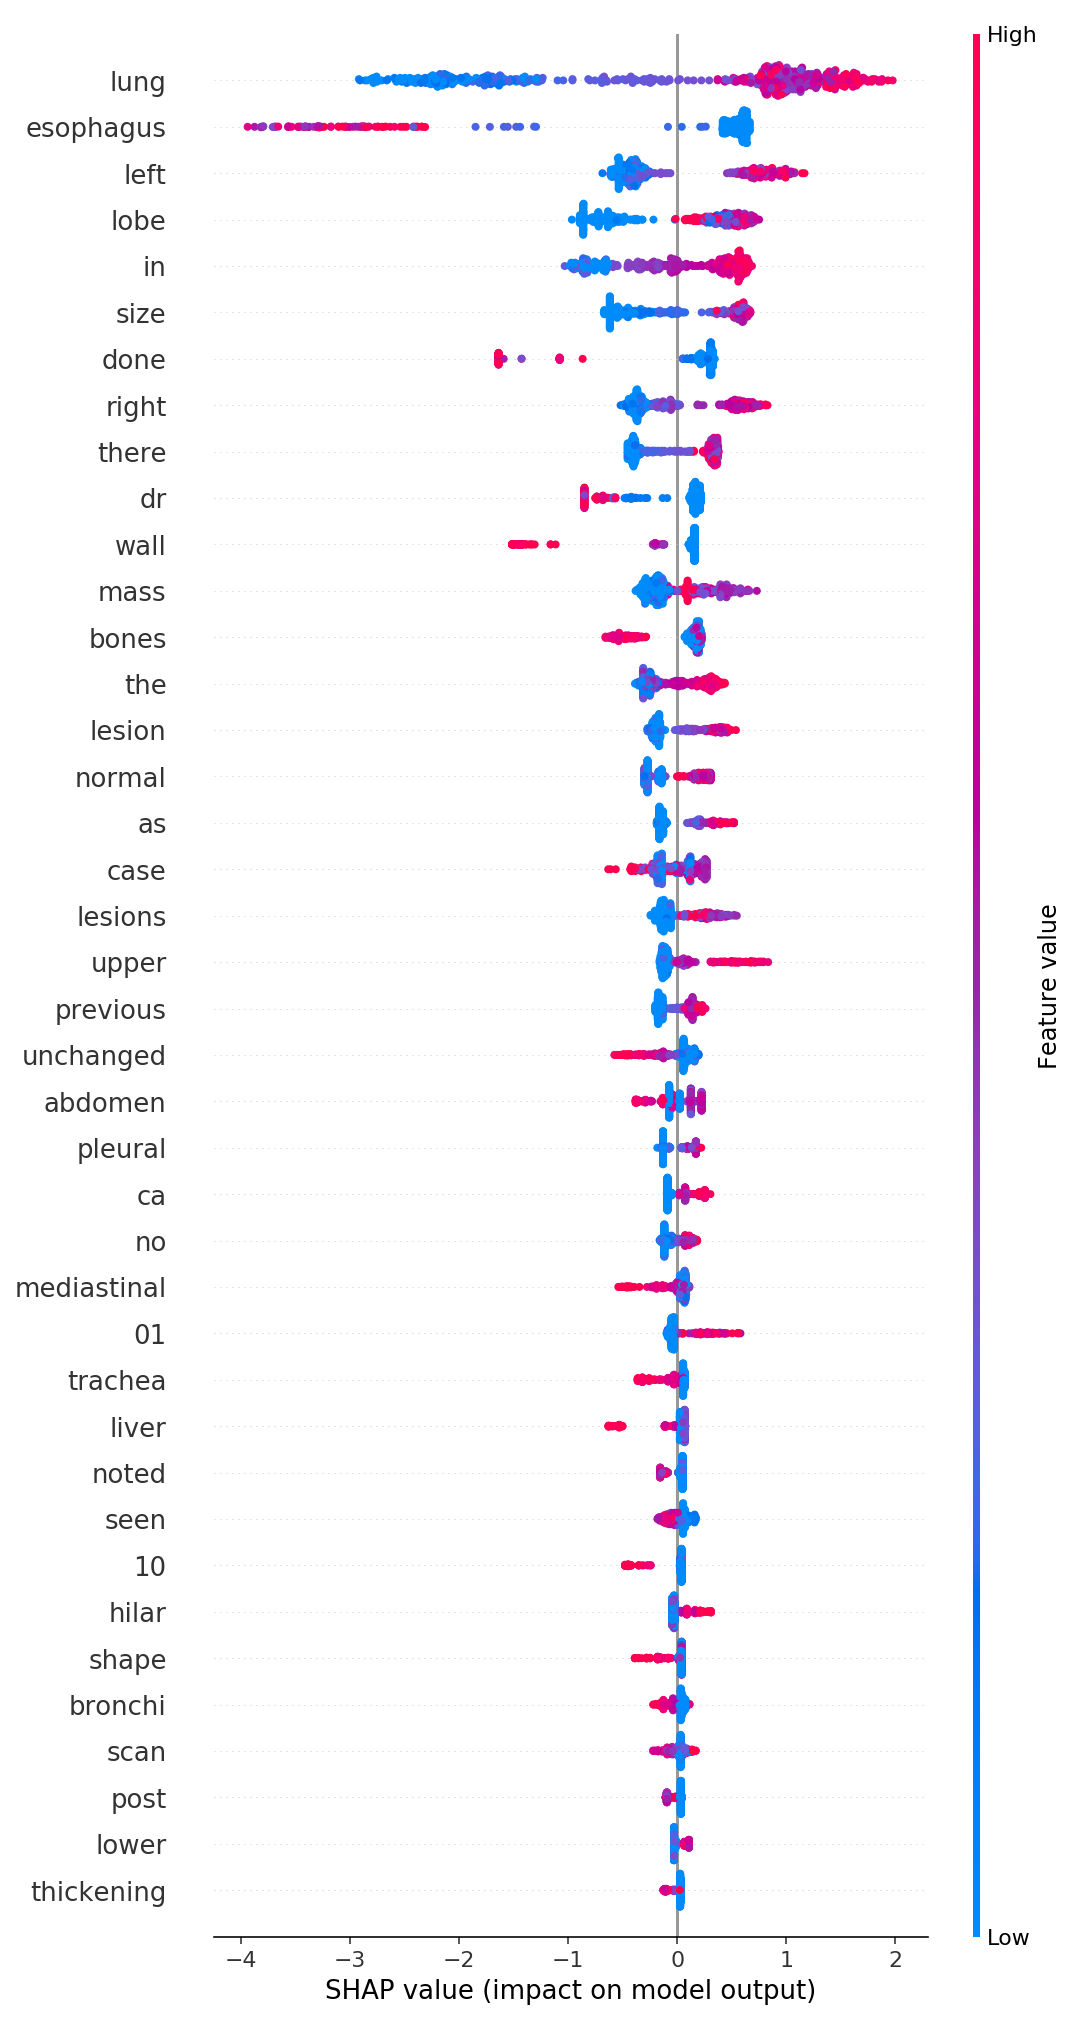

In [20]:
### lets train a model based on tfidf

data_train = pd.read_csv("D:/NLP/Data/ct_report_dmg_thoracic_only_LDAtrain_CHECKED.csv", sep=',', header=None, encoding='latin1')

data_train = data_train[[1, 8]]

data_train = data_train.rename(columns={8 : "labels", 1 : "text"})

data_train= data_train.dropna()

data_train['label_num'] = data_train.labels.map({'NC':0, 'C':1})

# data_train.head()


labels = data_train[["label_num"]]

Features = data_train.drop('labels', 1)

Features = Features.drop('label_num', 1)

# Features = Features.dropna()
# Features.head()

# Features = Features.values

X_train_Data, X_test_Data, y_train, y_test = train_test_split(Features, labels, test_size = 0.1, random_state = 10)

## Topic Modelling Classifier

X_train = X_train_Data["text"]
X_test = X_test_Data["text"]


import pickle

filename = 'D:/NLP/Algorithm/Models/tfidf.sav'
with open(filename, 'rb') as f:
    model_tfidf = pickle.load(f)
    f.close()

 
filename = 'D:/NLP/Algorithm/Models/clf_NC_C_tfidf.sav'
with open(filename, 'rb') as f:
    model = pickle.load(f)
    f.close()

# X_train = X_train.values
# X_test = X_test.values

X_train = model_tfidf.transform(X_train)
X_test = model_tfidf.transform(X_test)

type(X_train)
X_train = X_train.toarray()
X_test = X_test.toarray()

explainer = shap.TreeExplainer(model.best_estimator_, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_train)
# X_test_array = X_test.toarray()
shap.summary_plot(shap_values, X_train, feature_names=model_tfidf.get_feature_names(), max_display = 40)